# Cenário 📊

Acabo de ser contratado como Data Analyst pela empresa fictícia EcoStyle Co., um e-commerce de moda sustentável com operações no Brasil e na Europa.

<br>

## Contexto do negócio

Modelo => Venda online de roupas e acessórios ecológicos (B2C) <br>
Objetivo em 2025 => Aumentar a receita em 25 %, reduzir churn para < 5 % ao mês, otimizar investimento em marketing digital
<br>
Desafio atual: Crescemos rápido; agora precisamos saber onde investir e quais produtos/mercados impulsionam (ou travam) o crescimento.

### 🗂️ Dados fornecidos

*** Estão em formato CSV; você pode carregar com pd.read_csv(). ***
- sales_2024.csv;
- customers.csv;
- marketing_spend.csv;
- site_traffic.csv


#### 🔍Perguntas que devem ser respondidas

.📈 Como evoluíram as receitas mensais em 2024?
.🏆 Quais 10 sub-categorias geraram mais receita e margem? 
.💸 Qual canal traz melhor retorno (Revenue / Spend)?
.🔄 Qual a taxa de recompra por coorte de mês de aquisição?
.🕒 Há horário/dia com maior taxa de conversão?

-------------------------

Cronograma ⏱️

Exploração & limpeza	até 03 Jun 2025
Visualizações preliminares	06 Jun 2025
Relatório final + recomendações	10 Jun 2025


# 📂 1  Carregamento dos Dados

In [1]:
import pandas as pd

df_sales=pd.read_excel('EcoStyle.xlsx', sheet_name='sales_2024')
df_sales.head()

,order_id,order_date,country,customer_id,category,sub_category,units,unit_price,discount,shipping_cost
0,ORD1000,2024-01-03,EU,CUST168,Acessorios,Sapatos,1,192.47,43.72,11.05
1,ORD1001,2024-03-05,BR,CUST187,Roupas,Calcas,2,234.36,4.37,16.93
2,ORD1002,2024-02-23,BR,CUST109,Acessorios,Vestidos,1,147.05,6.55,12.40
3,ORD1003,2024-02-17,BR,CUST111,Roupas,Vestidos,2,140.80,36.75,7.22
4,ORD1004,2024-03-26,BR,CUST141,Acessorios,Calcas,4,226.89,7.85,16.34


# 🧹 1.1  Limpeza e preparação dos dados

In [14]:
import matplotlib.pyplot as plt


ordem_meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


df_sales['month_abbr'] = df_sales['order_date'].dt.strftime('%b').str.capitalize()
df_sales['month_abbr'] = pd.Categorical(df_sales['month_abbr'], categories=ordem_meses, ordered = True)

df_sales['revenue'] = (df_sales['units'] * df_sales['unit_price']) - (df_sales['discount'] + df_sales['shipping_cost'])
df_sales.head()

,order_id,order_date,country,customer_id,category,sub_category,units,unit_price,discount,shipping_cost,month_abbr,revenue
0,ORD1000,2024-01-03,EU,CUST168,Acessorios,Sapatos,1,192.47,43.72,11.05,Jan,137.70
1,ORD1001,2024-03-05,BR,CUST187,Roupas,Calcas,2,234.36,4.37,16.93,Mar,447.42
2,ORD1002,2024-02-23,BR,CUST109,Acessorios,Vestidos,1,147.05,6.55,12.40,Feb,128.10
3,ORD1003,2024-02-17,BR,CUST111,Roupas,Vestidos,2,140.80,36.75,7.22,Feb,237.63
4,ORD1004,2024-03-26,BR,CUST141,Acessorios,Calcas,4,226.89,7.85,16.34,Mar,883.37


# 📊 2 Análise de vendas

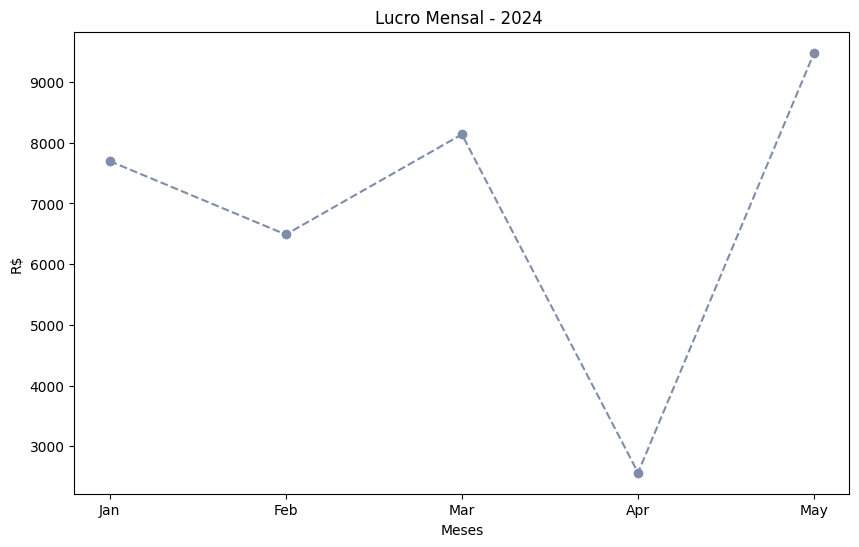

In [15]:
year_trend = df_sales.groupby('month_abbr', observed=True)['revenue'].sum().reset_index()
year_trend.head()


plt.figure(figsize=(10,6))
plt.plot(year_trend['month_abbr'], year_trend['revenue'], marker='o', linestyle='--', color='#7F8CAA')
plt.title('Lucro Mensal - 2024 ')
plt.ylabel('R$')
plt.xlabel('Meses')
plt.show()


## 📊 2.1 Análise de vendas comparando países

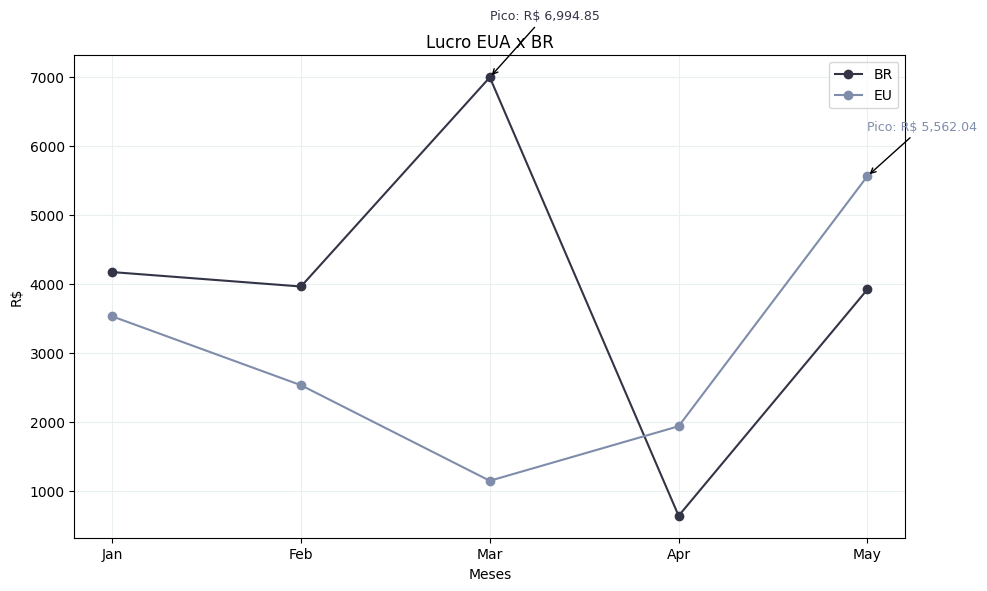

In [ ]:
monthly_trend = df_sales.groupby(['country', 'month_abbr'], observed = True)['revenue'].sum().reset_index()

colors = ['#333446', '#7F8CAA']

plt.figure(figsize=(10,6))

# Itera sobre país + cor ao mesmo tempo
for country, color in zip(monthly_trend['country'].unique(), colors):
    country_data = monthly_trend[monthly_trend['country'] == country]

    # Plot da linha
    plt.plot(country_data['month_abbr'], country_data['revenue'],
             marker='o', label=country, color=color)

    # Identifica o pico (máxima receita)
    max_idx = country_data['revenue'].idxmax()
    max_month = country_data.loc[max_idx, 'month_abbr']
    max_value = country_data.loc[max_idx, 'revenue']

    # Adiciona anotação
    plt.annotate(f'Pico: R$ {max_value:,.2f}',
                 xy=(max_month, max_value),
                 xytext=(max_month, max_value + max_value * 0.12),  # desloca o texto 10% acima
                 arrowprops=dict(facecolor=color, arrowstyle='->'),
                 fontsize=9, color=color)

# Ajustes do gráfico
plt.xlabel('Meses')
plt.ylabel('R$')
plt.title('Lucro EUA x BR')
plt.legend()
plt.grid(True, color='#EAEFEF')
plt.tight_layout()
plt.show()

📌 Observação: Em abril ocorreu um evento no qual o lucro por região inverteu, o Brasil que vinha dominando teve uma queda bastante considerável nas vendas, e os EUA nesse mesmo mês se recuperou e passou a dominar o faturamento da empresa, apesar de em maio o Brasil recuperar metade do faturamento perdido os EUA ainda continua evoluindo sem perspectivas de quedas até o momento.

## 📊 2.3 Lucro por subcategoria

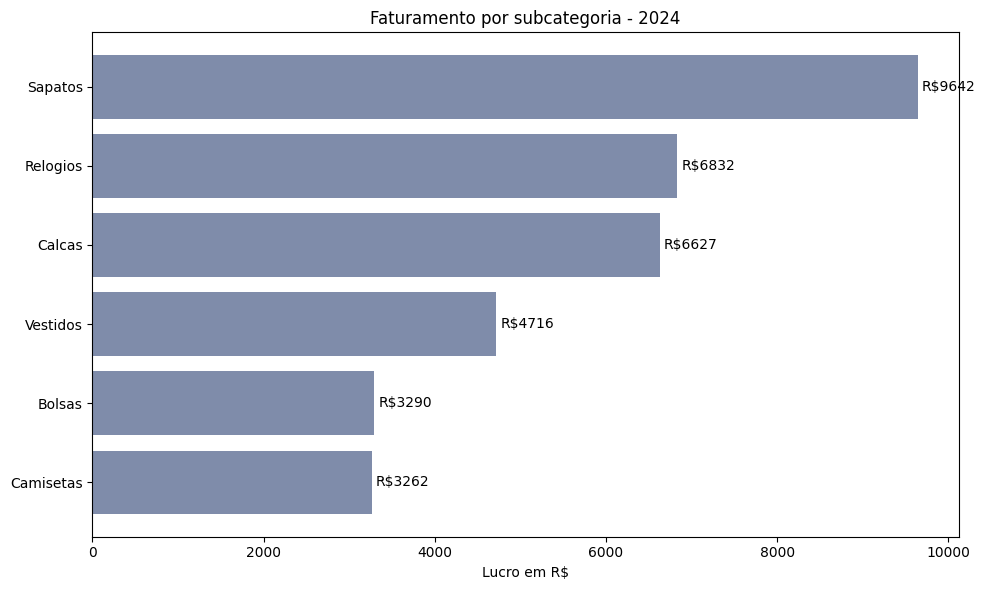

In [21]:
sub_categories = df_sales.groupby('sub_category')['revenue'].sum().reset_index()

# Ordenar do maior para o menor (com maiores no topo)
sub_categories_sorted = sub_categories.sort_values('revenue', ascending=True)

# Criar o gráfico
plt.figure(figsize=(10,6))
bars = plt.barh(sub_categories_sorted['sub_category'], 
                sub_categories_sorted['revenue'], 
                color='#7F8CAA')

# Adicionar rótulos de valor
plt.bar_label(bars, fmt=(f'R$'+ '%.0f'), padding=3)
plt.xlabel('Lucro em R$')
plt.title('Faturamento por subcategoria - 2024')
plt.tight_layout()
plt.show()

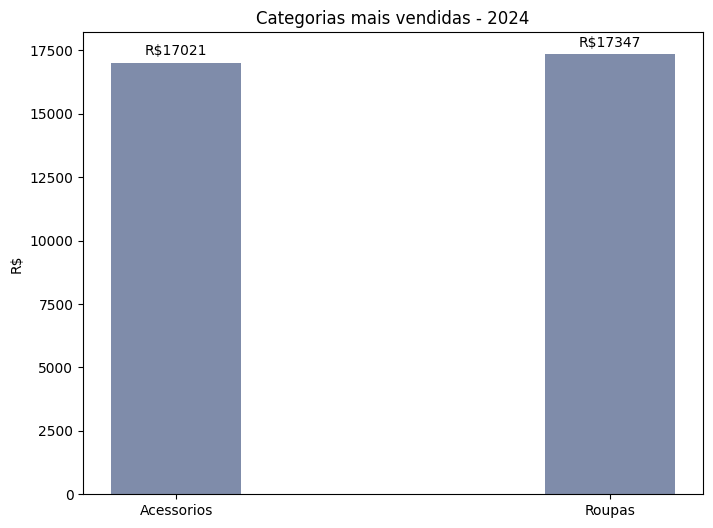

In [ ]:
categories = df_sales.groupby('category')['revenue'].sum().reset_index()
categories = categories.sort_values('revenue', ascending=True)

categories

plt.figure(figsize=(8,6))
bars = plt.bar(categories['category'], categories['revenue'], width=0.3, color='#7F8CAA')
plt.bar_label(bars, fmt=(f'R$'+ '%.0f'), padding=3)
plt.title('Categorias mais vendidas - 2024')
plt.ylabel('R$')
plt.show()


In [22]:
df_sales

,order_id,order_date,country,customer_id,category,sub_category,units,unit_price,discount,shipping_cost,month_abbr,revenue
0,ORD1000,2024-01-03,EU,CUST168,Acessorios,Sapatos,1,192.47,43.72,11.05,Jan,137.70
1,ORD1001,2024-03-05,BR,CUST187,Roupas,Calcas,2,234.36,4.37,16.93,Mar,447.42
2,ORD1002,2024-02-23,BR,CUST109,Acessorios,Vestidos,1,147.05,6.55,12.40,Feb,128.10
3,ORD1003,2024-02-17,BR,CUST111,Roupas,Vestidos,2,140.80,36.75,7.22,Feb,237.63
4,ORD1004,2024-03-26,BR,CUST141,Acessorios,Calcas,4,226.89,7.85,16.34,Mar,883.37
...,...,...,...,...,...,...,...,...,...,...,...,...
95,ORD1095,2024-01-01,EU,CUST152,Roupas,Sapatos,2,104.09,42.37,19.18,Jan,146.63
96,ORD1096,2024-05-21,EU,CUST184,Roupas,Sapatos,4,196.84,13.83,19.20,May,754.33
97,ORD1097,2024-05-30,BR,CUST123,Roupas,Calcas,2,171.71,18.07,5.89,May,319.46
98,ORD1098,2024-05-19,EU,CUST140,Acessorios,Calcas,1,220.35,14.93,12.97,May,192.45
